### Final Contour Plots

#### Plot in between m(gluino) and m(gluino) - m(neutralino1)

#### Draw Contour for 0L as well such that we can see the upper region is already excluded by 0L + Jets Analysis
##### https://www.hepdata.net/record/95664 Obs Contour 3
##### https://arxiv.org/abs/2010.14293

#### We will take three uncertainties in total:
##### Statistical Uncertaintities : Sqrt(Sum of events^2)
##### Crosssection Uncertaintities
##### Energy Resolution  Uncertaintities

mass_difference_monojet [ 5. 10. 50.]

plus_stat_difference_monojet [ 5. 10. 50.]

minus_stat_difference_monojet [ 5. 10. 50.]

plus_stat_difference_monojet [ 5. 10. 50.]

minus_stat_difference_monojet [ 5. 10. 50.]


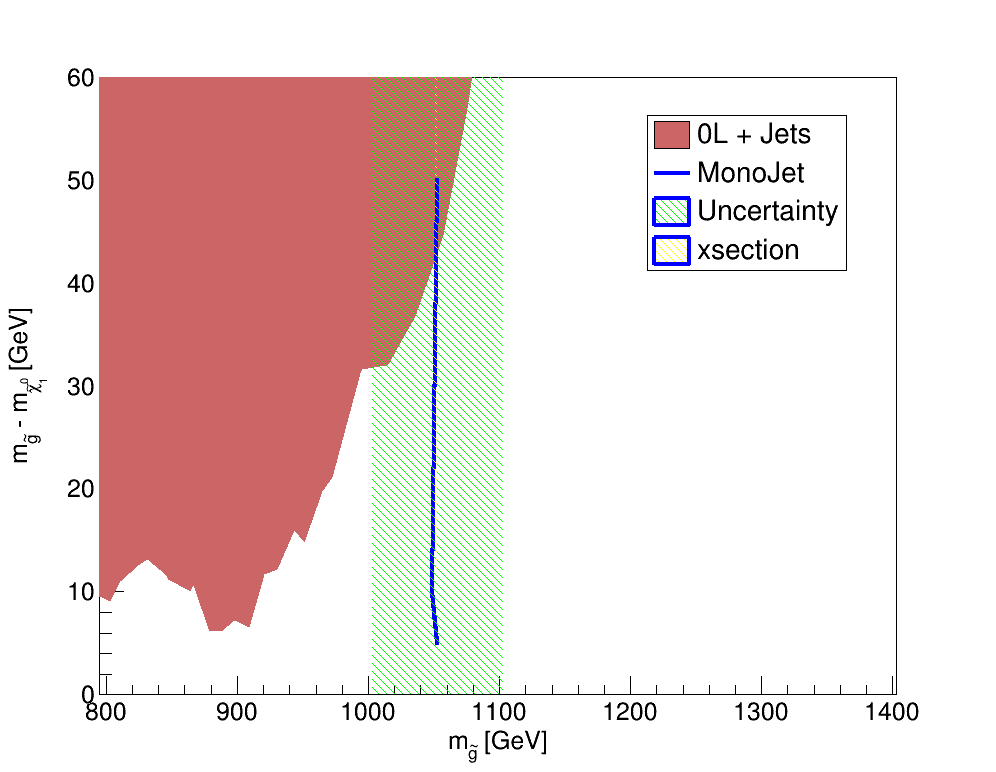

In [77]:
import numpy as np
import pandas as pd
import ROOT
import ctypes

# Data from the file
data_0L = pd.read_csv("contours/HEPData-ins1827025-v2-Obs.Contour_3.csv", skiprows=8)
gluino_mass_0L = data_0L['M(Gluino) [GeV]'].values
neutralino_mass_0L = data_0L['M(LSP) [GeV]'].values

mass_difference_0L = gluino_mass_0L - neutralino_mass_0L

neutralino_mass_monojet = np.array([1047.5, 1038.5, 1003.0])
gluino_mass_monojet = np.array([1052.5, 1048.5, 1053.0])

mass_difference_monojet = gluino_mass_monojet - neutralino_mass_monojet

print("mass_difference_monojet", mass_difference_monojet)

### Uncertainties

plus_stat_neutralino_mass_monojet = np.array([1039.0, 1030.0, 985.0 ])
plus_stat_gluino_mass_monojet = np.array([1044.0, 1040.0, 1035.0 ])

minus_stat_neutralino_mass_monojet = np.array([1055.0, 1046.0, 1018.0])
minus_stat_gluino_mass_monojet = np.array([1060.0, 1056.0, 1068.0])

plus_stat_difference_monojet = plus_stat_gluino_mass_monojet - plus_stat_neutralino_mass_monojet
minus_stat_difference_monojet = minus_stat_gluino_mass_monojet - minus_stat_neutralino_mass_monojet

print("\nplus_stat_difference_monojet", plus_stat_difference_monojet)
print("\nminus_stat_difference_monojet", minus_stat_difference_monojet)

plus_xsection_neutralino_mass_monojet = np.array([1031.5, 1022.0, 987.0 ])
plus_xsection_gluino_mass_monojet = np.array([1036.5, 1032.0, 1037.0 ])

minus_xsection_neutralino_mass_monojet = np.array([1065.0, 1056.0, 1020.0])
minus_xsection_gluino_mass_monojet = np.array([1070.0, 1066.0, 1070.0])

plus_xsection_difference_monojet = plus_xsection_gluino_mass_monojet - plus_xsection_neutralino_mass_monojet
minus_xsection_difference_monojet = minus_xsection_gluino_mass_monojet - minus_xsection_neutralino_mass_monojet

print("\nplus_stat_difference_monojet", plus_xsection_difference_monojet)
print("\nminus_stat_difference_monojet", minus_xsection_difference_monojet)


graph_0L = ROOT.TGraph(len(gluino_mass_0L), gluino_mass_0L, mass_difference_0L)

graph_monojet = ROOT.TGraph(len(gluino_mass_monojet), gluino_mass_monojet, mass_difference_monojet)


graph_uncertainty_stat = ROOT.TGraphErrors(
    len(gluino_mass_monojet),
    gluino_mass_monojet,
    mass_difference_monojet,
    minus_stat_difference_monojet,
    plus_stat_difference_monojet
)

# Set fill style and color for the uncertainty bands
graph_uncertainty_stat.SetLineColor(4)
graph_uncertainty_stat.SetLineWidth(1504)
graph_uncertainty_stat.SetFillStyle(3005)
graph_uncertainty_stat.SetFillColor(3)

graph_uncertainty_xsection = ROOT.TGraphErrors(
    len(gluino_mass_monojet),
    gluino_mass_monojet,
    mass_difference_monojet,
    minus_xsection_difference_monojet,
    plus_xsection_difference_monojet
)

# Set fill style and color for the uncertainty bands
graph_uncertainty_xsection.SetLineColor(4)
graph_uncertainty_xsection.SetLineWidth(1504)
graph_uncertainty_xsection.SetFillStyle(3005)
graph_uncertainty_xsection.SetFillColor(5)


# Create a new canvas and del previous if existing
existing_canvas = ROOT.gROOT.FindObject("canvas")
if existing_canvas:
    existing_canvas.IsA().Destructor(existing_canvas)

canvas = ROOT.TCanvas("canvas", "", 1000, 800)
canvas.cd()

graph_0L.SetFillColor(ROOT.kRed -6)
graph_0L.Draw("AF")

graph_monojet.SetLineColor(ROOT.kBlue)
graph_monojet.SetLineWidth(4)
graph_monojet.Draw("L")

graph_uncertainty_stat.Draw("2SAME")
graph_uncertainty_xsection.Draw("2SAME")

graph_0L.GetXaxis().SetTitle("m_{#tilde{g}} [GeV]")
graph_0L.GetYaxis().SetTitle("m_{#tilde{g}} - m_{#tilde{#chi}_{1}^{0}} [GeV]")
graph_0L.GetXaxis().CenterTitle()
graph_0L.GetYaxis().CenterTitle()
graph_0L.SetTitle("")

graph_0L.GetYaxis().SetTitleOffset(1.3)
graph_0L.GetXaxis().SetTitleOffset(1.2)

graph_0L.GetXaxis().SetRangeUser(800, 1400)
graph_0L.GetYaxis().SetRangeUser(0, 60)

graph_0L.GetXaxis().SetRangeUser(800, 1400)
graph_0L.GetYaxis().SetRangeUser(0, 60)

legend = ROOT.TLegend(0.65, 0.65, 0.85, 0.85)
legend.SetTextSize(0.04)
legend.AddEntry(graph_0L, "0L + Jets", "F")
legend.AddEntry(graph_monojet, "MonoJet", "L")
legend.AddEntry(graph_uncertainty_stat, "Uncertainty", "F")
legend.AddEntry(graph_uncertainty_xsection, "xsection", "F")
legend.Draw()

canvas.Draw()
